## 数量化Ⅲ類
アーティスト、回答者、の類似度を分析

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
like = pd.read_csv("/kaggle/input/favoriteartist/like_artist_binary_data.csv")
like

,id,kitani,gesu,ztmy,sungho,nulut,keina,fuji,yorushika,bknb,colormal,eve,indigo,mao,mega,mi8k,utubo,hitsu
0,1,1,0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,1
1,2,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1
2,3,1,0,0,1,1,1,0,1,1,1,0,0,1,1,1,1,1
3,5,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
4,6,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
5,7,1,1,1,1,1,1,0,1,0,1,1,1,1,0,1,1,1
6,8,1,1,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0
7,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
M = like.drop("id", axis=1)
M

,kitani,gesu,ztmy,sungho,nulut,keina,fuji,yorushika,bknb,colormal,eve,indigo,mao,mega,mi8k,utubo,hitsu
0,1,0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,1
1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1
2,1,0,0,1,1,1,0,1,1,1,0,0,1,1,1,1,1
3,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
4,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
5,1,1,1,1,1,1,0,1,0,1,1,1,1,0,1,1,1
6,1,1,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0
7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
M.shape

(21, 17)

In [5]:
M.sum(axis=0)    # 各列の平均

kitani       11
gesu          7
ztmy          6
sungho        5
nulut         8
keina         6
fuji          4
yorushika    14
bknb          6
colormal      6
eve           4
indigo        5
mao          10
mega          4
mi8k          6
utubo         5
hitsu         5
dtype: int64

In [6]:
M.sum(axis=1)    # 各行の平均

0     11
1      6
2     12
3      5
4      2
5     14
6      6
7      1
8      1
9      1
10     1
11     2
12     3
13     6
14     9
15    14
16     1
17     7
18     2
19     4
20     4
dtype: int64

In [7]:
# 各sampleの和の対角行列
A = np.diag(M.sum(axis=1))
A

array([[11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,

In [8]:
A_inv = np.linalg.inv(A)
A_inv

array([[0.09090909, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.16666667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08333333, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.2       , 0.        ,
        0.        , 0.        , 0.        , 0.       

In [9]:
# 各カテゴリの和の対角行列
B = np.diag(M.sum(axis=0))
B

array([[11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  

In [10]:
B_half = B ** (1/2)
B_half_inv = np.linalg.inv(B_half)

B_half_inv

array([[0.30151134, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.37796447, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.40824829, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.4472136 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.      

In [11]:
C = B_half_inv @ M.T @ A_inv @ M @ B_half_inv
C

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.138279,0.070547,0.046359,0.065231,0.078643,0.076199,0.038831,0.095710,0.061546,0.073224,0.073224,0.056718,0.107571,0.065208,0.073224,0.075076,0.065231
1,0.070547,0.302721,0.121238,0.052319,0.060452,0.044087,0.031497,0.028862,0.025717,0.022043,0.053995,0.052319,0.056916,0.044996,0.022043,0.012074,0.024147
2,0.046359,0.121238,0.201659,0.042680,0.054361,0.047619,0.018557,0.077463,0.000000,0.038961,0.058321,0.086940,0.030179,0.014580,0.038961,0.029639,0.042680
3,0.065231,0.052319,0.042680,0.096753,0.050138,0.041297,0.057596,0.037901,0.045644,0.057894,0.031944,0.028571,0.068415,0.034606,0.057894,0.049134,0.063420
4,0.078643,0.060452,0.054361,0.050138,0.123467,0.089352,0.016071,0.077584,0.012028,0.061807,0.050508,0.066508,0.094460,0.076463,0.061807,0.056412,0.050138
5,0.076199,0.044087,0.047619,0.041297,0.089352,0.144841,0.000000,0.094821,0.055556,0.037698,0.058321,0.026082,0.061476,0.031591,0.037698,0.028256,0.041297
6,0.038831,0.031497,0.018557,0.057596,0.016071,0.000000,0.439394,0.078964,0.034021,0.018557,0.000000,0.000000,0.040726,0.000000,0.018557,0.020328,0.020328
7,0.095710,0.028862,0.077463,0.037901,0.077584,0.094821,0.078964,0.269362,0.090924,0.064906,0.064906,0.070196,0.088308,0.035529,0.064906,0.066548,0.057821
8,0.061546,0.025717,0.000000,0.045644,0.012028,0.055556,0.034021,0.090924,0.500000,0.013889,0.000000,0.000000,0.032275,0.017010,0.013889,0.015215,0.015215
9,0.073224,0.022043,0.038961,0.057894,0.061807,0.037698,0.018557,0.064906,0.013889,0.099146,0.029161,0.046368,0.076798,0.054271,0.099146,0.065139,0.088323


In [12]:
eigen_value, eigen_vector = np.linalg.eig(C)

np.linalg.eigでは固有値は大きい順に表示される。  
固有値は全て1以下の正の数で、固有値1は常に出現し意味を持たない。  
よって、1を除外したものから大きい順に固有値、固有ベクトルを使う

In [13]:
print("相関係数1", np.sqrt(eigen_value[1]))
print("相関係数2", np.sqrt(eigen_value[2]))

相関係数1 0.708430376286733
相関係数2 0.6541658740863945


In [14]:
# 第一カテゴリースコア
cat_score_1 = B_half_inv @ eigen_vector[1]
cat_score_1

array([-7.53778361e-02,  4.90735212e-02, -3.51444154e-03, -3.48758370e-01,
        8.64670857e-02, -7.99431102e-02,  3.04181284e-02,  8.05765638e-03,
       -1.66146224e-01,  8.61561392e-03, -4.53254029e-02, -3.68060637e-02,
       -6.82650194e-03, -8.27126704e-02,  1.00817015e-02, -5.16457312e-03,
       -2.53399930e-18])

In [15]:
# 第二カテゴリースコア
cat_score_2 = B_half_inv @ eigen_vector[2]
cat_score_2

array([-6.97863158e-02,  6.17164680e-02, -4.98667168e-03, -1.76528678e-01,
       -1.12089294e-01,  1.44331172e-01, -2.12737548e-01,  7.26349700e-03,
        1.44894698e-01,  8.01951199e-02,  8.27191821e-03,  1.27701211e-01,
        4.03144659e-02,  1.33119589e-01, -2.41667063e-02,  6.24983924e-02,
       -7.16722727e-18])

In [16]:
# 第一サンプルスコア
sam_score_1 = (A_inv @ M @ cat_score_1) / eigen_value[1]
sam_score_1

0    -0.053618
1    -0.018414
2    -0.108212
3    -0.049669
4     0.038332
5    -0.062540
6    -0.021978
7    -0.331052
8     0.016055
9     0.097781
10   -0.331052
11    0.045389
12   -0.021428
13   -0.171895
14   -0.020737
15   -0.073577
16    0.060609
17   -0.017239
18   -0.157498
19    0.003863
20   -0.156120
dtype: float64

In [17]:
# 第二サンプルスコア
sam_score_2 = (A_inv @ M @ cat_score_2) / eigen_value[2]
sam_score_2

0    -0.087104
1     0.013172
2     0.044798
3     0.022696
4    -0.240077
5     0.024158
6     0.070485
7     0.338592
8     0.016973
9     0.144220
10    0.338592
11    0.066284
12    0.101245
13   -0.082617
14    0.063626
15    0.035946
16   -0.497128
17    0.011591
18    0.177783
19    0.046631
20    0.132441
dtype: float64

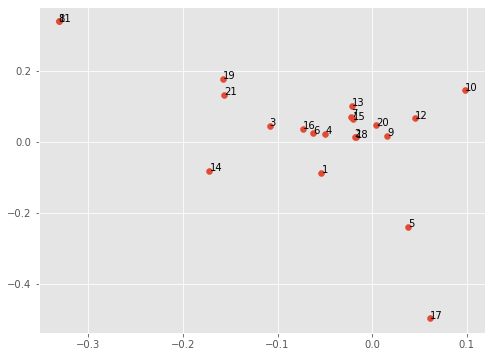

In [18]:
# サンプルスコアのプロット
ids = list(range(1, M.shape[0]+1, 1))

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(sam_score_1, sam_score_2)

for i, label in enumerate(ids):
    ax.annotate(label, (sam_score_1[i], sam_score_2[i]))
    
plt.show()

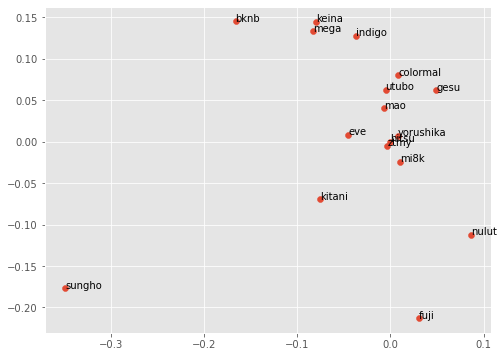

In [19]:
artist_name = M.columns

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(cat_score_1, cat_score_2)

for i, label in enumerate(artist_name):
    ax.annotate(label, (cat_score_1[i], cat_score_2[i]))
    
plt.show()

sunghoはエレクトロニカ色が強めで他アーティストとジャンルが異なるため離れている。

In [20]:
def quantify_type3(data):
    
    A = np.diag(data.sum(axis=1))    # 各サンプルの和の対角行列
    B = np.diag(data.sum(axis=0))    # 各カテゴリの和の対角行列
    
    A_inv = np.linalg.inv(A)
    B_half_inv = np.linalg.inv(B ** (1/2))
                               
    C = B_half_inv @ data.T @ A_inv @ data @ B_half_inv
                               
    eigen_value, eigen_vector = np.linalg.eig(C)
    
    # カテゴリースコア
    cat_score_1 = B_half_inv @ eigen_vector[1]
    cat_score_2 = B_half_inv @ eigen_vector[2]
    # サンプルスコア
    sam_score_1 = (A_inv @ data @ cat_score_1) / eigen_value[1]
    sam_score_2 = (A_inv @ data @ cat_score_2) / eigen_value[2]
    
    return cat_score_1, cat_score_2, sam_score_1, sam_score_2

In [21]:
tmp = np.array([
    [0, 1, 1, 0, 0],
    [0, 1, 0, 0, 0],
    [1, 0, 0, 1, 1],
    [1, 1, 0, 1, 1],
    [1, 1, 1, 0, 0],
    [1, 0, 1, 0, 0]
])

In [22]:
cat1, cat2, sam1, sam2 = quantify_type3(tmp)

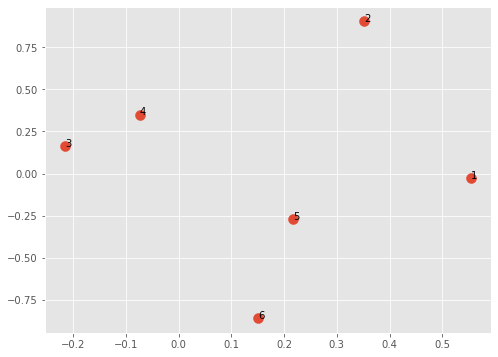

In [23]:
# サンプルスコアのプロット
ids = list(range(1, tmp.shape[0]+1, 1))

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(sam1, sam2, s=100)

for i, label in enumerate(ids):
    ax.annotate(label, (sam1[i], sam2[i]))
    
plt.show()

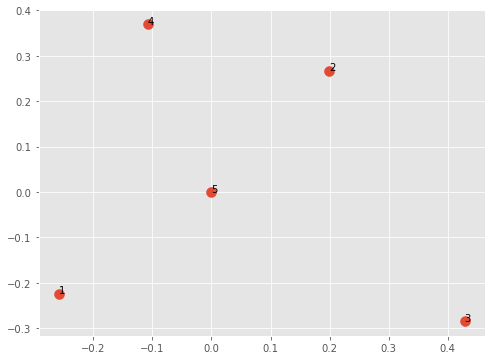

In [24]:
# カテゴリースコアのプロット
ids = list(range(1, tmp.shape[1]+1, 1))

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(cat1, cat2, s=100)

for i, label in enumerate(ids):
    ax.annotate(label, (cat1[i], cat2[i]))
    
plt.show()